# <h1><center>Interventions des pompiers dans la ville de Montréal et dans la ville de Laval</center></h1>
Travail réalisé par Alex-Anne Favreau, Krumgant et Gabriel Mercier-Harnois

## Questions de recherche

#### Ville de Montréal et de Laval:

- Quels types d'incidents nécessitant l'intervention des pompiers sont les plus fréquents?

- Le type d'incident varie-t-il selon la ville?

#### Concentration sur la ville de Montréal:

- Pour les types d'incidents qui varient selon le moment de l'année (ex.: selon la saison), comme les feux de cheminée et les incidents nautiques, quel mois de l'année requiert davantage l'aide des pompiers?

- Le nombre de véhicules de pompiers déployés varie-t-il selon l'incident?

- Le revenu des habitants des différents arrondissements de la ville de Montréal a-t-il une impact sur le nombre d'incidents qui surviennent dans leur arrondissement?


#### Le but de notre analyse est de discerner s'il y a des tendances afin que les pompiers puissent être mieux préparés lors de leurs éventuelles interventions.

## Premières étapes

Les premières étapes sont très importantes au niveau de la préparation de nos données. Dans le cadre de notre recherche, il faut commencer par lire le contenu des fichiers comportant les informations sur lesquelles nous allons baser nos analyses. Par la suite, pour faciliter les manipulations et la comparaison, nous allons faire des ajustements sur les DataFrames obtenus en fonction de ce que nous avons besoin.

### Lire le contenu des fichiers CSV

In [40]:
# Ouverture du fichier ayant les informations sur Montréal (donneesouvertes-interventions-sim) sous la forme d'un DataFrame
# Importer le module 'pandas'

import pandas

# Charger le contenu d'un fichier csv nommé "interventions-pompiers" dans un DataFrame, qui représente les données 
# sur la ville de Laval

laval_df = pandas.read_csv("interventions-pompiers.csv", delimiter = ',')

# Charger le contenu d'un fichier csv nommé "donneesouvertes-interventions-sim" dans un DataFrame, qui représente les données 
# sur la ville de Montréal

df_montreal = pandas.read_csv("donneesouvertes-interventions-sim.csv", delimiter = ',')

In [41]:
# Vérification

# Affichage du DataFrame de la ville de Montréal (5 premiers index)
df_montreal.head(5)

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
0,14296,2015-02-07T20:34:06,Premier répondant,1-REPOND,41,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294987.0,5042966.9,-73.625624,45.526550
1,14927,2015-02-09T15:34:09,Premier répondant,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,1.0,298329.2,5047486.1,-73.582899,45.567255
2,14965,2015-02-09T17:03:57,Ac.véh./1R/s.v./ext/29B/D,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,2.0,300817.1,5047852.3,-73.551029,45.570569
3,14966,2015-02-09T17:05:27,Premier répondant,1-REPOND,37,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294789.2,5045095.4,-73.628200,45.545701
4,14968,2015-02-09T17:13:02,Premier répondant,1-REPOND,39,Montréal,Mercier-Hochelaga-Maisonneuve,7,1.0,302005.3,5048148.5,-73.535807,45.573240


### Renommer les colonnes de nos DataFrame

Cette étape nous permet de faciliter la comparaison entre les données de la ville de Montréal et de la ville de Laval, en plus de permettre une meilleure compréhension en insérant des termes qui nous semblent plus familiers.

In [42]:
# Changer le nom des colonnes afin que les deux fichiers CSV (Laval et Montréal) aient des noms de colonnes qui concordent
# et qui sont comparables.

# Ville de Montréal
df_montreal.columns = ['Incident_nbr', 'Date_Heure', 'Incident_Type_Desc', 'Desc_Groupe', 'Num_Caserne', 'Nom_Ville', 'Nom_Arrond','Division','Nombre_unités','MTM8_X','MTM8_Y','Longitude','Latitude']

# Ville de Laval
laval_df.columns = ['Date_Heure', 'Rue', 'Code_Postal_Partiel', 'Num_Caserne','Code_Type', 'Incident_Type_Desc', 'Code_Sous_Type', 'Desc_Sous_Type']


In [43]:
# Vérification

# Affichage du DataFrame de la ville de Montréal (5 premiers index)
df_montreal.head(5)

,Incident_nbr,Date_Heure,Incident_Type_Desc,Desc_Groupe,Num_Caserne,Nom_Ville,Nom_Arrond,Division,Nombre_unités,MTM8_X,MTM8_Y,Longitude,Latitude
0,14296,2015-02-07T20:34:06,Premier répondant,1-REPOND,41,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294987.0,5042966.9,-73.625624,45.526550
1,14927,2015-02-09T15:34:09,Premier répondant,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,1.0,298329.2,5047486.1,-73.582899,45.567255
2,14965,2015-02-09T17:03:57,Ac.véh./1R/s.v./ext/29B/D,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,2.0,300817.1,5047852.3,-73.551029,45.570569
3,14966,2015-02-09T17:05:27,Premier répondant,1-REPOND,37,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294789.2,5045095.4,-73.628200,45.545701
4,14968,2015-02-09T17:13:02,Premier répondant,1-REPOND,39,Montréal,Mercier-Hochelaga-Maisonneuve,7,1.0,302005.3,5048148.5,-73.535807,45.573240


### Afficher le type de données des colonnes de nos DataFrame

Cette étape est particulièrement pertinente afin de voir si les colonnes affichant des dates sont perçues comme telles par pandas. Dans notre cas, la colonne 'Date_Heure' est celle à observer.

In [44]:
# Voir le type de données initial de chacune de nos colonnes dans le DataFrame comportant les informations de nos fichiers csv

# Ville de Montréal
print('Montréal:\n')
print(df_montreal.dtypes)

print('-------------------------------')

# Ville de Laval
print('Laval:\n')
print(laval_df.dtypes)

Montréal:

Incident_nbr            int64
Date_Heure             object
Incident_Type_Desc     object
Desc_Groupe            object
Num_Caserne             int64
Nom_Ville              object
Nom_Arrond             object
Division                int64
Nombre_unités         float64
MTM8_X                float64
MTM8_Y                float64
Longitude             float64
Latitude              float64
dtype: object
-------------------------------
Laval:

Date_Heure             object
Rue                    object
Code_Postal_Partiel    object
Num_Caserne             int64
Code_Type               int64
Incident_Type_Desc     object
Code_Sous_Type         object
Desc_Sous_Type         object
dtype: object


### Convertir la colonne 'Date_Heure' apparaissant dans nos DataFrame

Dans le code ci-haut, si nous portons une attention particulière à la colonne 'Date_Heure', nous remarquons que ses données sont présentement considérées comme des objets sans type particulier. Nous voulons donc les convertir afin que ces données soient traitées comme des dates pour Pandas.

In [45]:
# Convertir la colonne 'Date_Heure' avec Datetime afin que les données de cette colonne soient considérées comme
# des dates

# Ville de Montréal
df_montreal["Date_Heure"] = pandas.to_datetime(df_montreal["Date_Heure"])

# Ville de Laval
laval_df['Date_Heure']= pandas.to_datetime(laval_df['Date_Heure'])

In [46]:
# Vérification

# Ville de Montréal
print('Montréal:\n')
print(df_montreal.dtypes)

print('-------------------------------')

# Ville de Laval
print('Laval:\n')
print(laval_df.dtypes)

Montréal:

Incident_nbr                   int64
Date_Heure            datetime64[ns]
Incident_Type_Desc            object
Desc_Groupe                   object
Num_Caserne                    int64
Nom_Ville                     object
Nom_Arrond                    object
Division                       int64
Nombre_unités                float64
MTM8_X                       float64
MTM8_Y                       float64
Longitude                    float64
Latitude                     float64
dtype: object
-------------------------------
Laval:

Date_Heure             datetime64[ns]
Rue                            object
Code_Postal_Partiel            object
Num_Caserne                     int64
Code_Type                       int64
Incident_Type_Desc             object
Code_Sous_Type                 object
Desc_Sous_Type                 object
dtype: object


La mention 'datetime64[ns]' nous mentionne que les données de la colonne 'Date_Heure' sont maintenant considérées comme des dates par Pandas.

## Début de l'analyse

Les prochaines cellules de code nous aideront à répondre à nos questions de recherche.

### Quels types d'incidents sont les plus fréquents? Le type d'incident varie-t-il selon la ville?

Afin de répondre à ces questions, nous allons catégoriser les différents incidents de la ville de Montréal et de la ville de Laval, pour ensuite comparer les résultats, soit les interventions pompières les plus fréquentes auprès des deux villes.

#### Laval

Pour répondre à la première question, nos allons classifier les différents types incidents en fonction de ceux qui se trouvent dans la colonne 'Desc_Sous_Type' (cette colonne donne une description précise de l'accident). Cependant, celle-ci a plusieurs valeurs manquantes (caractérisées par NAN dans le DataFrame)
, ce qui peut avoir une influence sur les résultats de notre analyse. Nous allons donc remplacer les valeurs NAN par la description plus générale de l'incident présente dans la colonne 'Incident_Type_Desc'.

In [47]:
# Changer les valeurs manquantes dans la colonne 'Desc_Sous_Type'  par la description plus générale de 
# la colonne 'Incident_Type_Desc'

laval_df["Desc_Sous_Type"]=laval_df["Desc_Sous_Type"].fillna(laval_df["Incident_Type_Desc"])

# Affichage/Vérification
laval_df.head(60)

,Date_Heure,Rue,Code_Postal_Partiel,Num_Caserne,Code_Type,Incident_Type_Desc,Code_Sous_Type,Desc_Sous_Type
0,2016-01-01 02:47:00,@440 Est - Belgrand,NaN,3,99,Autre intervention sans incendie,117,Appel annulé par le central (10-3) (Autre que ...
1,2016-01-01 18:38:00,Tolède,H7M,9,99,Autre intervention sans incendie,117,Appel annulé par le central (10-3) (Autre que ...
2,2016-01-01 19:06:00,Sainte-Rose,H7R,6,14,Incendie extérieur propagé à au moins un bâtiment,NaN,Incendie extérieur propagé à au moins un bâtiment
3,2016-01-01 19:30:00,Piverts,H7L,8,99,Autre intervention sans incendie,101A,Système d'alarme / défectuosité
4,2016-01-01 20:11:00,Belle-Rive,H7V,2,99,Autre intervention sans incendie,122,Sauvetage ascenseur
5,2016-01-01 20:13:00,Samson,H7W,4,99,Autre intervention sans incendie,104,Senteur ou fuite intérieur
6,2016-01-02 00:05:00,12e,H7N,1,99,Autre intervention sans incendie,104,Senteur ou fuite intérieur
7,2016-01-02 02:10:00,Le Corbusier,H7S,2,16,"Incendie limité au bâtiment d'origine, autre q...",NaN,"Incendie limité au bâtiment d'origine, autre q..."
8,2016-01-02 04:45:00,Saint-Jean,H7A,5,16,"Incendie limité au bâtiment d'origine, autre q...",NaN,"Incendie limité au bâtiment d'origine, autre q..."
9,2016-01-02 08:19:00,Souvenir,H7N,2,99,Autre intervention sans incendie,112,Dégat d'eau ou inondation


Nous allons maintenant regrouper nos données en fonction des différents types d'incidents survenus dans la ville de Laval (selon la colonne 'Desc_Sous_Type'), afin de connaître la fréquences de chacun de ceux-ci. Le but est de connaître les types d'incidents les plus fréquemment traités par les pompiers dans la ville de Laval.

In [48]:
# 1. Ajouter la colonne 'Number' qui aidera à faire le 'count' des incidents avec le 'Groupby' utile à notre analyse
laval_df["Number"]=1

# Affichge/Vérification
laval_df.head(5)

,Date_Heure,Rue,Code_Postal_Partiel,Num_Caserne,Code_Type,Incident_Type_Desc,Code_Sous_Type,Desc_Sous_Type,Number
0,2016-01-01 02:47:00,@440 Est - Belgrand,NaN,3,99,Autre intervention sans incendie,117,Appel annulé par le central (10-3) (Autre que ...,1
1,2016-01-01 18:38:00,Tolède,H7M,9,99,Autre intervention sans incendie,117,Appel annulé par le central (10-3) (Autre que ...,1
2,2016-01-01 19:06:00,Sainte-Rose,H7R,6,14,Incendie extérieur propagé à au moins un bâtiment,NaN,Incendie extérieur propagé à au moins un bâtiment,1
3,2016-01-01 19:30:00,Piverts,H7L,8,99,Autre intervention sans incendie,101A,Système d'alarme / défectuosité,1
4,2016-01-01 20:11:00,Belle-Rive,H7V,2,99,Autre intervention sans incendie,122,Sauvetage ascenseur,1


In [49]:
# 2. Créer une variable qui contiendra le 'Groupby' calculant la fréquence de chacun des types d'incidents

catégorie_incident_laval = laval_df.groupby(['Desc_Sous_Type'])[['Number']].count() 


# 3. Trouver les catégories qui reviennent le plus souvent

catégorie_incident_laval_order = catégorie_incident_laval.nlargest(100,columns=["Number"]) 


# 4. Réinitialiser l'index pour s'assurer que l'index soit traité comme une colonne 

catégorie_incident_laval_order = catégorie_incident_laval_order.reset_index()


# Affichage de la nouvelle variable

catégorie_incident_laval_order

,Desc_Sous_Type,Number
0,Appel annulé par le central (10-3) (Autre que ...,4258
1,Système d'alarme / défectuosité,2593
2,Vérification,2564
3,Aliments surchauffés (sans incendie),2418
4,"Incendie limité à l'éxtérieur, sans pertes",2263
5,Système d'alarme / déclenché accidentellement,1996
6,Sécurisé une scène autre qu'un accident routier,1739
7,Dégat d'eau ou inondation,1563
8,Assistance autres services / citoyens,1455
9,Senteur ou fuite intérieur,1389


Comme nous pouvons le voir avec l'affichage de la cellule précédente, une grande variété de types d'incidents est survenue dans la ville de Laval. Toutefois, certaines interventions ont eu lieu plutôt rarement comparativement à d'autres et plusieurs se ressemblent. Afin d'alléger le nombre de catégories avec lesquelles nous devons faire nos analyses et d'avoir une image plus globale de la situation/intervention, nous avons décidé de regrouper certains incidents sous le nom d'autres catégories. Pour ce faire, nous allons renommer les incidents les moins fréquents ou dans le même genre par le nom d'une nouvelle catégorie les représentant.

In [50]:
# 5. Ajouter à notre DataFrame 'laval_df' la colonne 'Desc_Sous_Type_Replace' qui contiendra les nouvelles catégories
# de nos types d'incidents (soit celles représentant les regroupements) en se basant sur la colonne 'Desc_Sous_Type' déjà
# présente dans le DataFrame

laval_df['Desc_Sous_Type_Replace'] = laval_df['Desc_Sous_Type']

# Affichage
laval_df.head(5)

,Date_Heure,Rue,Code_Postal_Partiel,Num_Caserne,Code_Type,Incident_Type_Desc,Code_Sous_Type,Desc_Sous_Type,Number,Desc_Sous_Type_Replace
0,2016-01-01 02:47:00,@440 Est - Belgrand,NaN,3,99,Autre intervention sans incendie,117,Appel annulé par le central (10-3) (Autre que ...,1,Appel annulé par le central (10-3) (Autre que ...
1,2016-01-01 18:38:00,Tolède,H7M,9,99,Autre intervention sans incendie,117,Appel annulé par le central (10-3) (Autre que ...,1,Appel annulé par le central (10-3) (Autre que ...
2,2016-01-01 19:06:00,Sainte-Rose,H7R,6,14,Incendie extérieur propagé à au moins un bâtiment,NaN,Incendie extérieur propagé à au moins un bâtiment,1,Incendie extérieur propagé à au moins un bâtiment
3,2016-01-01 19:30:00,Piverts,H7L,8,99,Autre intervention sans incendie,101A,Système d'alarme / défectuosité,1,Système d'alarme / défectuosité
4,2016-01-01 20:11:00,Belle-Rive,H7V,2,99,Autre intervention sans incendie,122,Sauvetage ascenseur,1,Sauvetage ascenseur


In [51]:
# 6. Remplacement des types d'incidents les moins fréquents/dans le même genre par le nom de la nouvelle catégorie les
# représentant dans la colonne 'Desc_Sous_Type_Replace'

laval_df["Desc_Sous_Type_Replace"]= laval_df['Desc_Sous_Type_Replace'].replace(["Noyade","Nautique d'été", "Nautique d'hiver"],"Incidents nautiques")\
.replace(["Système d'alarme / défectuosité","Système d'alarme / déclenché accidentellement","Système d'alarme / déclenché par des travaux","Système d'alarme / déclenché malicieusement","Système d'alarme / déclenché par des tests", "Désuet ** Système d'alarme / plan d'action / sensibilisation A-N-F","Désuet ** Système d'alarme - ATTENTION, Ancien code, ne pas utiliser"], "Système d'alarme")\
.replace(["Sécurisé une scène autre qu'un accident routier","Accident routier / assistance","Accident routier / désincarcération","Incendie limité à l'extérieur, feu de véhicule","Incendie limité au bâtiment d'origine, autre que 15",""], "Accidents routiers")\
.replace(["Senteur ou fuite intérieur", "Senteur ou fuite extérieur"],"Gaz")\
.replace(["Vérification","Bâtiment affaibli (sécuriser les lieux)","Autre type d'intervention","Intervention CO / appareil de détection défectueux","Dégagement autre","Incendie extérieur propagé à au moins un bâtiment","Incendie limité à l'extérieur, autre que 11 et 12","Incendie limité à l'éxtérieur, sans pertes","Incendie propagé à au moins un autre bâtiment","Intervention CO"],"Autres")\
.replace(["Appel annulé par le central (10-3) (Autre que Alarme incendie)","Appel annulé par le central (10-3) (Alarme incendie non sensibilisée)"],"Appel annulé par le central")\
.replace(["Intervention impliquant des explosifs","Intervention impliquant des matières dangereuses"],"Intervention impliquant des matières dangereuses")

In [52]:
# 7. Refaire le même 'Groupby' qu'à l'étape [2.], en considérant maintenant les nouvelles catégories de la colonne 
# 'Desc_Sous_Type_Replace'

catégorie_incident_laval = laval_df.groupby(["Desc_Sous_Type_Replace"])[['Number']].count() 


# 8. Trouver les catégories qui reviennent le plus souvent

catégorie_incident_laval_order = catégorie_incident_laval.nlargest(100,columns=["Number"]) 


# 9. Ajouter des nouveaux index afin que les index actuels de la nouvelle variable deviennent des colonnes

catégorie_incident_laval_order=catégorie_incident_laval_order.reset_index()


# 10. Affichage de la nouvelle variable

catégorie_incident_laval_order

,Desc_Sous_Type_Replace,Number
0,Système d'alarme,6685
1,Autres,5612
2,Appel annulé par le central,4282
3,Accidents routiers,4261
4,Aliments surchauffés (sans incendie),2418
5,Gaz,2013
6,Dégat d'eau ou inondation,1563
7,Assistance autres services / citoyens,1455
8,Problème électrique / chauffage / autre sans c...,814
9,Incidents nautiques,631


#### Montréal

Nous allons maintenant reproduire les mêmes étapes, mais cette fois-ci avec la ville de Montréal. Nous allons débuter à partir de l'étape 2 du processus effectué pour la ville de Laval.

In [53]:
# 1. Créer une variable qui contiendra le 'Groupby' calculant la fréquence de chacun des types d'incidents

catégorie_incident_montreal = df_montreal.groupby(['Incident_Type_Desc'])[['Incident_nbr']].count()


# 2. Trouver les catégories qui reviennent le plus souvent

catégorie_incident_montreal_order = catégorie_incident_montreal.nlargest(180, columns=["Incident_nbr"])


# 3. Ajouter des nouveaux index afin que les index actuels de la nouvelle variable deviennent des colonnes

catégorie_incident_montreal_order = catégorie_incident_montreal_order.reset_index()


# Affichage de la nouvelle variable avec tabulate

from tabulate import tabulate
print(tabulate(catégorie_incident_montreal_order))

---  ------------------------------  ------
  0  Premier répondant               536836
  1  Appel de Cie de détection        60492
  2  Alarme privé ou locale           39870
  3  Ac.véh./1R/s.v./ext/29B/D        31634
  4  Aliments surchauffés             27775
  5  10-22 sans feu                   20326
  6  Problèmes électriques            18451
  7  Inondation                       17438
  8  Odeur suspecte - gaz             15649
  9  Ascenseur                        13711
 10  Acc. sans victime sfeu - ext.    12565
 11  Déchets en feu                   10038
 12  Aide à un citoyen                 8814
 13  Feu de champ *                    8548
 14  Ac.véh./1R/s.v./V.R./29B/D        7846
 15  Structure dangereuse              7409
 16  10-22 avec feu                    5729
 17  Alarme vérification               4490
 18  Fuite ext.:hydrocar. liq. div.    3146
 19  Feu de véhicule extérieur         3093
 20  Avertisseur de CO                 2155
 21  Assistance serv. muni.     

In [54]:
# 4. Ajouter à notre DataFrame 'df_montreal' la colonne 'Desc_Sous_Type_Replace' qui contiendra les nouvelles catégories
# de nos types d'incidents (soit celles représentant les regroupements) en se basant sur la colonne 'Desc_Sous_Type' déjà
# présente dans le DataFrame

df_montreal['Incident_Type_Desc_Replace'] = df_montreal['Incident_Type_Desc']

# Affichage

df_montreal.head(5)

,Incident_nbr,Date_Heure,Incident_Type_Desc,Desc_Groupe,Num_Caserne,Nom_Ville,Nom_Arrond,Division,Nombre_unités,MTM8_X,MTM8_Y,Longitude,Latitude,Incident_Type_Desc_Replace
0,14296,2015-02-07 20:34:06,Premier répondant,1-REPOND,41,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294987.0,5042966.9,-73.625624,45.526550,Premier répondant
1,14927,2015-02-09 15:34:09,Premier répondant,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,1.0,298329.2,5047486.1,-73.582899,45.567255,Premier répondant
2,14965,2015-02-09 17:03:57,Ac.véh./1R/s.v./ext/29B/D,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,2.0,300817.1,5047852.3,-73.551029,45.570569,Ac.véh./1R/s.v./ext/29B/D
3,14966,2015-02-09 17:05:27,Premier répondant,1-REPOND,37,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294789.2,5045095.4,-73.628200,45.545701,Premier répondant
4,14968,2015-02-09 17:13:02,Premier répondant,1-REPOND,39,Montréal,Mercier-Hochelaga-Maisonneuve,7,1.0,302005.3,5048148.5,-73.535807,45.573240,Premier répondant


In [55]:
# 5. Remplacement des types d'incidents les moins fréquents/dans le même genre par le nom de la nouvelle catégorie les
# représentant dans la colonne 'Desc_Sous_Type_Replace'

df_montreal['Incident_Type_Desc_Replace']=df_montreal['Incident_Type_Desc_Replace'].replace(
                                                                ["10-07 Désincarcération lourde",
                                                                "INT. POLICIERE SANS URGENCE","PR 10-07 effon structure",
                                                                "PR espace clos","Entraide sauvetage en hauteur",
                                                                "PR sauv. tech. effon structure","Entraide autre", "EN02",
                                                                "Assistance dans le Métro","Sauv. espace clos / 10-09",
                                                                "Acc. vict.convoi (train/métro)","Acc. s-vict. feu - train/métro",
                                                                "Acc. s-vict. av. feu - pont","Acc. s-vict. av. feu - pont",
                                                                "Matières dangereuses / 10-09","10-07 Sauvetage en hauteur",
                                                                "10-22 pour un sauvetage pont","10-22 Sauvetage hauteur montag",
                                                                "Sauv techn-dégag pers coincée ","10-07 feu ou fumée puit accès",
                                                                "10-07 Sauvegage hauteur montag","Désincarcération lourde",
                                                                "Troisième alerte/autre que BAT","Sauv.effon.tranchée 10-07",
                                                                "Sauv.effon.structure F7/GAZ","Transbordement mat. explos",
                                                                "10-22 PR effon de structure","PR Détresse sur un pont", 
                                                                "10-22 Désincarcération lourde","PR 10-22 Désincarcération lour",
                                                                "Interv. aérogare ou bâtiment","10-22 Sauvetage en hauteur",
                                                                "PR10-22 Comb-dég pers coin/cap","Fuite contrôlée raffinerie",
                                                                "10-07 Sauvetage sur un pont","PR 10-07 effon tranchée",
                                                                "PR 10-07 impliquant 10-43","10-22 Sauvetage sur un pont",
                                                                "Sauv.effon.tranchée 10-22","Pour une interv. dans le metro",
                                                                "PR 10-07 espace clos","Deuxième alerte/autre que BAT",
                                                                "Ac.s.vict. sfeu train/métro ","10-22 Dégag pers conciée capti",
                                                                "Feu de navire/bâteau","Métro bâtiment /10-22 avec feu",
                                                                "Sauv. espace clos / 10-07","10-22 PR sauvetage tech. clos",
                                                                "EN01","Combiné-dégagement de victime", "Barricadage",
                                                                "Explosion","PR sauvetage en hauteur","Feu véh. convoi (train/métro)",
                                                                "10-22 feu ou fumée puit accès","Première alerte/autre que BAT",
                                                                "PR 10-07 Sauvetage en hauteur","Pers. en détresse sur pont",
                                                                "Incendie de fondoir à goudron","Entraide incendie - appel init",
                                                                "Sauv. espace clos / 10-22","INCIDENT CONTRÔLE RAFF/CH.FER ",
                                                                "Surplus d'huile","Feu / 5e Alerte","PR impliquant 10-43", 
                                                                "Matières dangereuses / 10-07","Feu / 4e Alerte",
                                                                "Sauvetage en hauteur / 10-07", "Agravation pos./Autre que BAT",
                                                                "Dégagement bâtiment","Interv. niveau/pistes +P",
                                                                "Feu / 3e Alerte","Métro bâtiment /10-22 sans feu", 
                                                                "Sauv.effon.struc. 10-22","10-22 PR sauvetage en hauteur",
                                                                "Feu / Agravation possible","Dégag bat./1rép - 22D02",
                                                                "Feu de nature électrique", 
                                                                "10-22 pour appel aéroport","10-22 PR impliquant 10-43",
                                                                "Feu / 2e Alerte","Acc. sans vict. sfeu bâtiment",
                                                                "Alarme détection / intrusion","Fumée - puit d'accès",
                                                                "Sauvetage en hauteur / 10-22","Senteur de feu à l'extérieur",
                                                                "Appel Cie détection CO F7/CO","Feu de cuisinière",
                                                                "Matières dangereuses / 10-22","Feu de bâtiment",
                                                                "Assistance serv. muni.","Avertisseur de CO", 
                                                                "Alarme vérification","10-22 avec feu","Structure dangereuse",
                                                                "Feu de champ *","Aide à un citoyen","Ac.véh./1R/v./rail:29D F7/DES",
                                                                "Ac.véh./1R/s.v./rail/29B/D","Sauv techn-dégag pers coincée"], "Autres") \
                                                                .replace(["Acc. vict. sfeu tunnel F7/MOU",
                                                                "Acc.véh/1rép/vict/tun 29D04 F7","Acc. victime sfeu - bâtiment",
                                                                "Acc.véh/1rép/vict/pont 29D04","Acc.véh/1rép/vict/bat 29D04",
                                                                "Acc. victime sfeu - voie rap.","Acc. véh victime sfeu - (ext.)",
                                                                "Acc.véh/1rép/vict/v.r. 29D04","Acc.véh/1rép/vict/ext 29D04", "Acc.véh/1rép/ sans victime","Acc. victime sfeu - pont",
                                                                "feu de véhicule tunnel F7/MOU","Acc. s-vict. av. feu - v.r.",
                                                                "Feu de véhicule sur pont","Feu de véhicule intérieur",
                                                                "Acc. sans victime sfeu  tunnel","Acc. sans victime sfeu  tunnel",
                                                                "Acc. sans vict. av. feu - ext.","Acc. sans vict. sfeu - pont",
                                                                "Ac.véh./s.v./tun/29B/D F7/MOU","Feu d'auto (voie rapide)",
                                                                "Ac.véh./1R/s.v./bat/29B/D","Ac.véh./1R/s.v./pont/29B/D",
                                                                "Surchauffe - véhicule","Acc. sans victime sfeu - v.r",
                                                                "Feu de véhicule extérieur","Ac.véh./1R/s.v./V.R./29B/D","Ac.véh./1R/s.v./ext/29B/D"],
                                                                "Accidents de voitures") \
                                                                .replace(["PR 10-07 nautique. intérieur","PR 10-07 nautique-glace",
                                                                "PR sauvetage naut plan eau int","Sauv. Hauteur J.Cartier/naut",
                                                                "Acc.véh/1rép/vict/pont 29D04","PR nautique-glace","PR nautique plan d'eau ext.",
                                                                "Sauvetage naut. glace/ 10-07","Sauv. nautique p.e. intérieurs",
                                                                "Sauv. nautique p.e. extérieurs","Sauvetage nautique/ 10-07",
                                                                "Sauv. nautique Zone 4","Sauv. nautique Zone 1","Sauv. nautique Zone 5",
                                                                "Sauv. nautique Zone 7","Sauv. nautique Zone 3",
                                                                "Sauv. naut.\surfaces glacées","Vérif.sauv.naut.\surf.glacées",
                                                                "Sauv. nautique Zone 6","Sauv. nautique Zone 2","PR 10-07 naut. plan d'eau ext."],"Incidents nautiques") \
                                                                .replace(["Sauv.effon.struc. 10-07 F7/GAZ","Fuite de gaz naturel complétée",
                                                                "Fuite gaz naturel 10-12","Fumigation F7/GAZ",
                                                                "Fuite gaz naturel F7/2GAZ","Fuite gaz naturel 10-09",
                                                                "Fuite de bonbonne de propane","Fuite int.:hydrocar. liq. div.",
                                                                "Avertisseur - gaz F7/GAZ","Appel de cie détection - GAZ",
                                                                "Fuite gaz nat 10-07 F7/2GAZ","Fuite gaz naturel 10-22",
                                                                "Fuite ext.:hydrocar. liq. div.", "Odeur suspecte - gaz"],"Incidents liés au gaz")\
                                                                .replace("Feu de cheminée *","Feu de cheminée")

In [56]:
# 7. Refaire le même 'Groupby' qu'à l'étape [2.], en considérant maintenant les nouvelles catégories de la colonne 
# 'Desc_Sous_Type_Replace'

catégorie_incident_montreal = df_montreal.groupby(['Incident_Type_Desc_Replace'])[['Incident_nbr']].count()


# 8. Trouver les catégories qui reviennent le plus souvent

catégorie_incident_montreal_order = catégorie_incident_montreal.nlargest(180, columns=["Incident_nbr"])


# 9. Ajouter des nouveaux index afin que les index actuels de la nouvelle variable deviennent des colonnes

catégorie_incident_montreal_order=catégorie_incident_montreal_order.reset_index()


# 10. Affichage de la nouvelle variable avec tabulate

from tabulate import tabulate
print(tabulate(catégorie_incident_montreal_order))

--  -----------------------------  ------
 0  Premier répondant              536836
 1  Appel de Cie de détection       60492
 2  Autres                          49848
 3  Accidents de voitures           48416
 4  Alarme privé ou locale          39870
 5  Aliments surchauffés            27775
 6  Incidents liés au gaz           23047
 7  10-22 sans feu                  20326
 8  Problèmes électriques           18451
 9  Inondation                      17438
10  Ascenseur                       13711
11  Acc. sans victime sfeu - ext.   12565
12  Déchets en feu                  10038
13  Incidents nautiques              1767
14  Fausse alerte 10-19               733
15  Feu de cheminée                   181
16  Alerte à la bombe                  56
--  -----------------------------  ------


#### Visualisation des données

Maintenant que les types d'incidents de la ville de Montréal et de la ville de Laval sont bien catégorisés et que ceux-ci sont respectivement classés de la fréquence la plus élevée à la plus faible, nous pouvons utiliser des outils qui nous permettront de visualiser les données pour facilement en venir à des conclusions. En effet, nous pourrons comparer si les interventions les plus fréquentes sont semblables d'une place à l'autre, ou si, au contraire, les pompiers font affaires à différents incidents. Cela sera possible à l'aide de la librairie 'Seaborn'.

#### Laval

##### Créer un histogramme

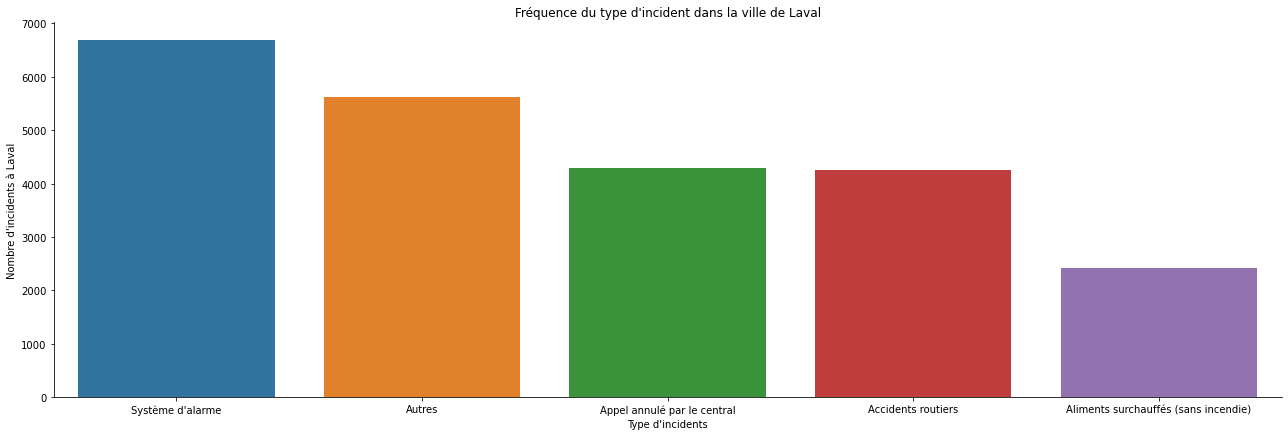

In [57]:
# 1. Importer Seaborn

import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2. Afficher l'histogramme en ordre décroissant, soit les cinq types d'incidents les plus fréquents

hist_laval = seaborn.catplot(kind='bar', x="Desc_Sous_Type_Replace", y='Number', height=6, aspect=3, data=catégorie_incident_laval_order.head(5)). \
                set(xlabel="Type d'incidents", ylabel="Nombre d'incidents à Laval", title= "Fréquence du type d'incident dans la ville de Laval")

#### Montréal

##### Créer un histogramme

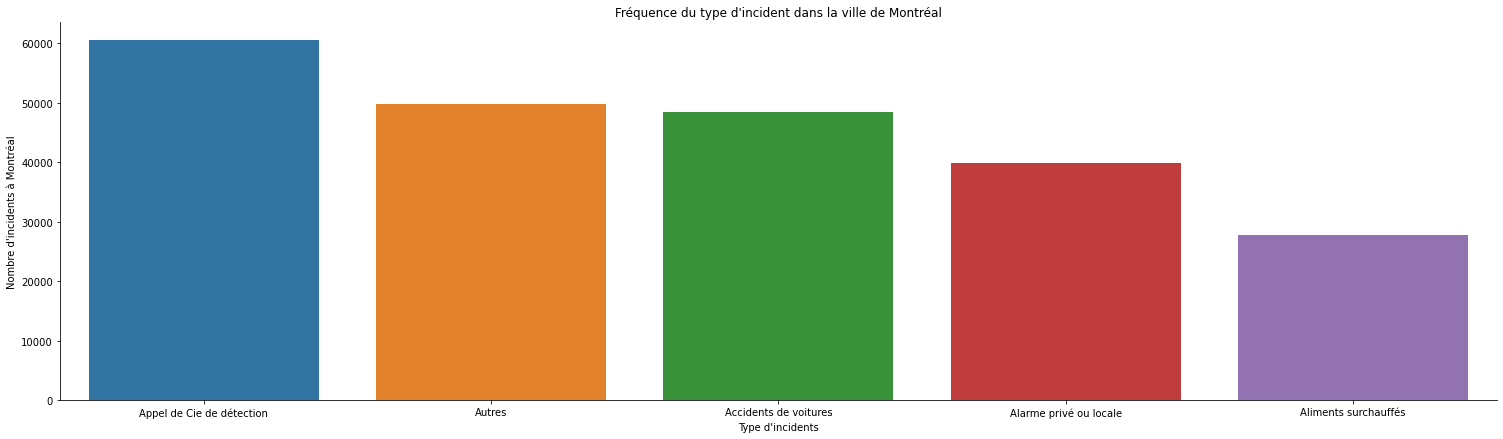

In [58]:
# Afficher l'histogramme en ordre décroissant, soit les cinq types d'incidents les plus fréquents
# Dans poster, préciser que Premiers répondants sont de loin la cause la plus importante *********

seaborn.catplot(kind='bar', x='Incident_Type_Desc_Replace', y='Incident_nbr',data=catégorie_incident_montreal_order, \
                order=['Appel de Cie de détection','Autres','Accidents de voitures','Alarme privé ou locale','Aliments surchauffés'], \
                height=6, aspect=3.5). \
                set(xlabel="Type d'incidents", ylabel="Nombre d'incidents à Montréal", title="Fréquence du type d'incident dans la ville de Montréal")

#### En observant les deux histogrammes précédents, chacun représentant leur ville respective, il est possible de répondre aux premières questions de recherche, soit 'Quels types d'incidents sont les plus fréquents?' et 'Le type d'incident varie-t-il selon la ville?'

Il est possible de remarquer que Montréal et Laval partagent notamment les accidents de voitures, les systèmes d’alarme et les aliments surchauffés comme incidents les plus fréquents. Même si l’ordre est différent d’une ville à l’autre, les pompiers peuvent s’attendre à devoir traiter ces types d’incidents plus fréquemment.  

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
####  Concentration sur Montréal >>
### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Pour les types d'incidents qui varient selon le moment de l'année (ex.: selon la saison), comme les feux de cheminée et les incidents nautiques, quel mois de l'année requiert davantage l'aide des pompiers?

Afin de répondre à cette question, nous allons regrouper les données du DataFrame de la ville de Montréal en fonction du mois de l'année dans lequel est survenu un incident ainsi que son type. Nous allons ensuite calculer la fréquence de chacun des incidents à chaque mois afin de voir si un certain incident survient plus fréquemment à une certaine période de l'année. **Pour cette analyse, nous utiliserons seulement les données de Montréal**.

In [59]:
# 1. Ajouter une colonne 'Month' en isolant le mois de la date inscrite dans la colonne 'Date_Heure' qui nous sera utile
# lors de notre 'Groupby'

df_montreal["Month"] = df_montreal["Date_Heure"].dt.month

# Affichage/Vérification
df_montreal.head(5)

,Incident_nbr,Date_Heure,Incident_Type_Desc,Desc_Groupe,Num_Caserne,Nom_Ville,Nom_Arrond,Division,Nombre_unités,MTM8_X,MTM8_Y,Longitude,Latitude,Incident_Type_Desc_Replace,Month
0,14296,2015-02-07 20:34:06,Premier répondant,1-REPOND,41,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294987.0,5042966.9,-73.625624,45.526550,Premier répondant,2
1,14927,2015-02-09 15:34:09,Premier répondant,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,1.0,298329.2,5047486.1,-73.582899,45.567255,Premier répondant,2
2,14965,2015-02-09 17:03:57,Ac.véh./1R/s.v./ext/29B/D,1-REPOND,50,Montréal,Rosemont-La Petite-Patrie,7,2.0,300817.1,5047852.3,-73.551029,45.570569,Accidents de voitures,2
3,14966,2015-02-09 17:05:27,Premier répondant,1-REPOND,37,Montréal,Villeray-Saint-Michel-Parc-Extension,8,1.0,294789.2,5045095.4,-73.628200,45.545701,Premier répondant,2
4,14968,2015-02-09 17:13:02,Premier répondant,1-REPOND,39,Montréal,Mercier-Hochelaga-Maisonneuve,7,1.0,302005.3,5048148.5,-73.535807,45.573240,Premier répondant,2


In [60]:
# 2. Créer une variable qui contiendra le 'Groupby' calculant la fréquence d'un incident en fonction de
# son type et du mois dans lequel il s'est déroulé

df_incidents_mois = df_montreal.groupby(['Month', 'Incident_Type_Desc_Replace'])[['Incident_nbr']].count()


# 3. Ajouter des nouveaux index afin que les index actuels de la nouvelle variable deviennent des colonnes

df_incidents_mois = df_incidents_mois.reset_index()


# Affichage/Vérification

df_incidents_mois

,Month,Incident_Type_Desc_Replace,Incident_nbr
0,1,10-22 sans feu,2223
1,1,Acc. sans victime sfeu - ext.,956
2,1,Accidents de voitures,3995
3,1,Alarme privé ou locale,3756
4,1,Aliments surchauffés,2507
...,...,...,...
198,12,Incidents liés au gaz,1688
199,12,Incidents nautiques,83
200,12,Inondation,1449
201,12,Premier répondant,40945


#### Visualisation des données

Maintenant que les différents incidents de la ville de Montréal sont bien classés en fonction de leur type et du mois dans lequel ils sont survenus, nous pouvons utiliser des outils qui nous permettront de visualiser les données pour facilement arriver à des conclusions. En effet, nous pourrons observer s'il y a certaines tendances (par exemple, si certaines interventions semblent survenir davantage l'hiver ou l'été). Cela sera possible à l'aide de la librairie 'Seaborn'. Ainsi, cela va nous permettre de répondre à la question de recherche suivante: 'Pour les types d'incidents qui varient selon le moment de l'année (ex.: selon la saison), comme les feux de cheminée et les incidents nautiques, quel mois de l'année requiert davantage l'aide des pompiers?'

##### Graphique à lignes

In [61]:
# 1. Créer une variable qui représentera un DataFrame qui contiendra la fréquence de seulement quelques types d'incidents
# qui nous intéressent davantage. 

# Pour ce faire, nous allons imposer des conditions au 'Groupby' créé dans la cellule précédente afin d'avoir seulement certaines
# valeurs de la colonne 'Incident_Type_Desc_Replace'

# Nous avons choisi les catégories 'Feu de cheminée' et 'Incidents nautiques' car les variations de la fréquence de ces incidents 
# peuvent être expliquées avec les périodes de l’année.

df_incidents_mois_visuel = df_incidents_mois[((df_incidents_mois["Incident_Type_Desc_Replace"] == 'Feu de cheminée') | \
                                            (df_incidents_mois["Incident_Type_Desc_Replace"] == "Incidents nautiques"))]


# Affichage
df_incidents_mois_visuel

,Month,Incident_Type_Desc_Replace,Incident_nbr
10,1,Feu de cheminée,29
12,1,Incidents nautiques,86
27,2,Feu de cheminée,27
29,2,Incidents nautiques,76
44,3,Feu de cheminée,23
46,3,Incidents nautiques,139
61,4,Feu de cheminée,27
63,4,Incidents nautiques,88
78,5,Feu de cheminée,8
80,5,Incidents nautiques,187


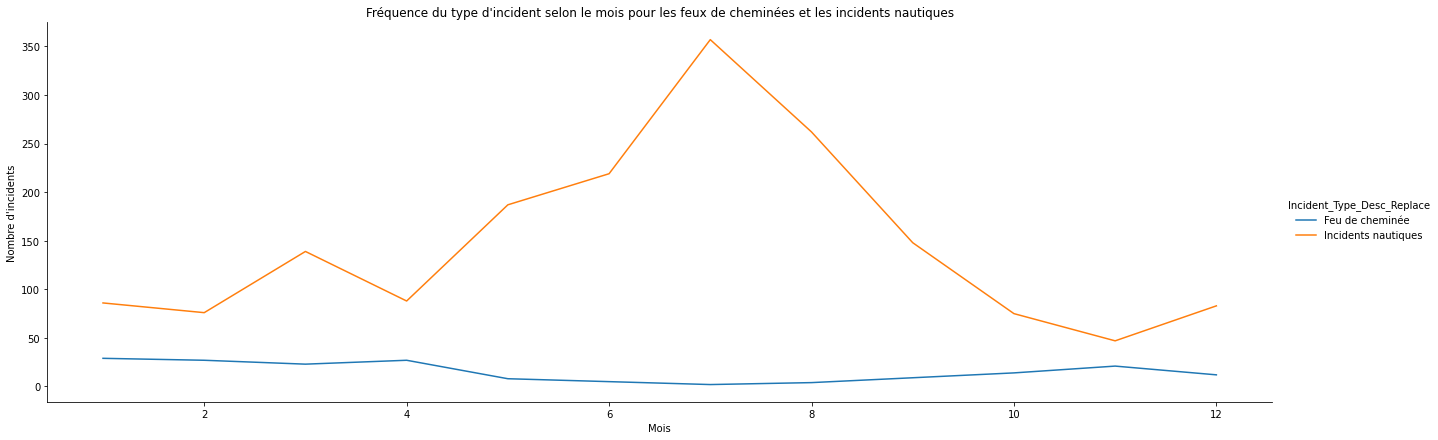

In [62]:
# 2. Faire un graphique en ressortant les deux types d'incidents conditionnés dans la variable 'df_incidents_mois_visuel'

seaborn.relplot(kind='line', x='Month', y='Incident_nbr', hue='Incident_Type_Desc_Replace', data=df_incidents_mois_visuel, height=6, aspect=3).\
                set(xlabel="Mois", ylabel="Nombre d'incidents", title="Fréquence du type d'incident selon le mois pour les feux de cheminées et les incidents nautiques")

Comme le nombre d’incidents causés par les feux de cheminée est beaucoup moins élevé que celui des incidents nautiques (soit de 181 comparé à 1767), nous allons créer un deuxième graphique incluant seulement les feux de cheminée pour pouvoir bien voir les variations selon les mois. 

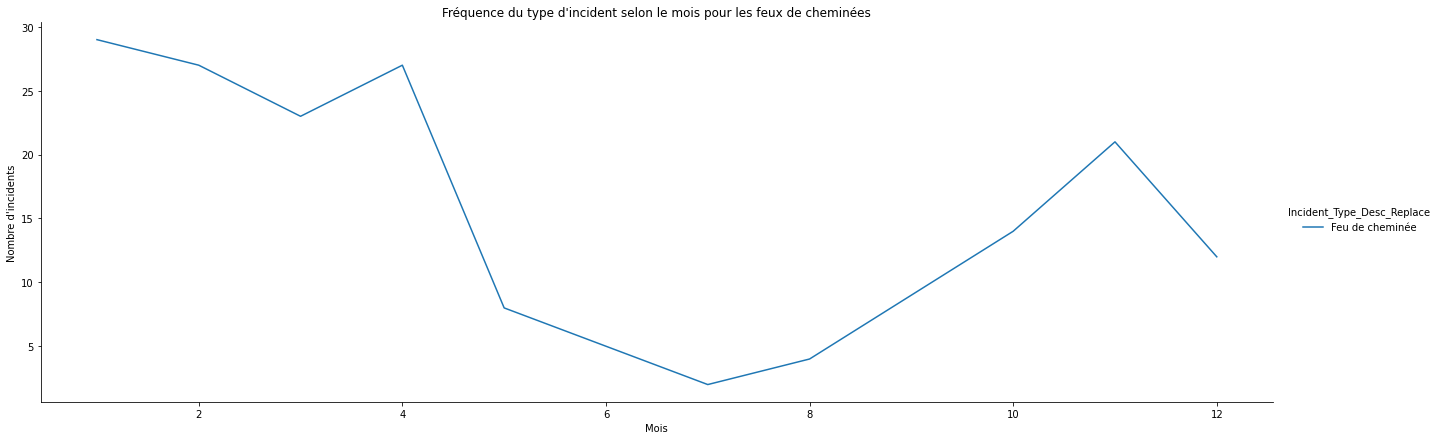

In [63]:
# 3. Faire un autre graphique pour mieux montrer les variations des incidents de feu de cheminée selon les mois 

df_incidents_mois_feu_de_cheminee = df_incidents_mois[((df_incidents_mois["Incident_Type_Desc_Replace"] == 'Feu de cheminée'))]


# Encore une fois, utilisation de seaborn pour faire afficher le graphique

seaborn.relplot(kind='line', x='Month', y='Incident_nbr', hue='Incident_Type_Desc_Replace', data=df_incidents_mois_feu_de_cheminee, height=6, aspect=3).\
                set(xlabel="Mois", ylabel="Nombre d'incidents", title="Fréquence du type d'incident selon le mois pour les feux de cheminées")

#### En observant les deux graphiques à lignes précedents, il est possible de répondre à la question 'pour les types d'incidents qui varient selon le moment de l'année (ex.: selon la saison), comme les feux de cheminée et les incidents nautiques, quel mois requiert davantage l'aide des pompiers?'
En effet, il est possible de constater que le mois le plus touché par les incidents nautiques nécessitant le renfort particulier des pompiers est le mois de juillet, alors que pour les feux de cheminée, c'est plutôt le mois de janvier (un des mois les plus froids de l'année) qui est le plus touché. Cette analyse permettrait aux pompiers de savoir quand exactement ils devraient se préparer pour ces types d'incidents.

##### Heat map with time / Carte thermique avec temps

De plus, pour aider à la visualisation, nous allons créer une map thermatique qui montre la fréquence des incidents nautiques selon les mois sur la carte de Montréal. Pour faire cela, nous allons utiliser le la librairie 'folium'.

In [64]:
# importer les librairies nous permettant de créer des maps

import folium 
from folium.plugins import HeatMapWithTime


# 1. Créer une variable qui représentera un DataFrame contenant les données de la catégotie des incidents nautiques seulement

df_incidents_nautiques = df_montreal.query('Incident_Type_Desc_Replace == "Incidents nautiques"')


# 2. Créer des variables pour les coordonnées utilisées dans la map (soit la longitude et latitude des incidents nautiques)

serie_longitude=df_incidents_nautiques["Longitude"].tolist()
serie_latitude=df_incidents_nautiques["Latitude"].tolist()


# 3. Créer une variable qui va contenir une serie de mois au cours desquels des incidents nautiques se sont produits
#    et les filtrer en ordre croissant de mois (de 1 à 12)

serie_date=df_incidents_nautiques["Month"].sort_values().astype('str')


# 4. Créer une variable qui représentera un DataFrame contenant les mois ainsi que les coordonnées géographiques des incidents natiques

endroits_incidents=pandas.DataFrame({"month":serie_date,"longitude" : serie_longitude, "latitude" : serie_latitude})


# Affichage

endroits_incidents


,month,longitude,latitude
155447,1,-73.696396,45.546274
802904,1,-73.905991,45.507857
339346,1,-73.548875,45.450292
822668,1,-73.853171,45.493462
828602,1,-73.935837,45.453950
...,...,...,...
873200,12,-73.539177,45.506055
704428,12,-73.764657,45.511646
704651,12,-73.666952,45.576152
193152,12,-73.619464,45.637027


In [65]:
# 5. Créer une variable représentant la map de Montréal (grâce aux coordonnées géographiques) en utilisant folium
hm = folium.Map(location=[45.5, -73.6], 
               tiles='cartodbpositron')

# 6. Importer le module 'collections' qui a les outils nous permettant de créer la HeatMap

from collections import defaultdict, OrderedDict


# 6.1 Créer une variable data qui permet de convertir une liste sous une certaine forme de dictionnaire
#     Defaultdict ne ressort jamais de KeyError : Il va fournir une valeur par défaut à une clé qui n'existe pas dans 
#     notre dictionnaire (output: defaultdict(list, {}))

data = defaultdict(list)


# 6.2 Créer une for loop qui permet de passer à travers le DataFrame 'endroits_incidents' 
#     'Itertuples' a permis de générer un objet d'itération du DataFrame, qui retourne chaque ligne en un tuple

# Cette for loop permet de créer le output suivant : defaultdict(list, {'1': [[45.546274, -73.696396], ...]})
# Ainsi, le dictionnaire vide du 'defaultdict' se rempli, ayant le mois en clé et une liste de listes 
# contenant chacune des latitudes avec sa longitude comme valeur

for row in endroits_incidents.itertuples():
    data[row.month].append([row.latitude, row.longitude])
    

# 6.3 Créer la HeatMap With Time
hm_time = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()), 
                     radius=18,
                     auto_play=True,
                     max_opacity=0.3)


# 6.4 Ajouter la map de Montréal à la HeatMap With Time

hm_time.add_to(hm)


# Afficher la map thermique en fonction des mois

hm

#### Observations
Grâce à la map thermique on peut remarquer que les casernes situées à proximité des rivages doivent rester plus vigilantes et préparées au fur et à mesure que la température se réchauffe, ce qui pourrait s'expliquer par les sports nautiques, les amateurs de bateaux, la baignade plus fréquente, etc. De plus, en ajoutant le temps sur la map, on peut facilement visualiser le mois le plus touché (représenté avec le plus de rouge sur la carte), qui est le mois de juillet. Ceci vient appuyer notre précédente analyse avec le graphique à lignes.


### Le nombre de véhicules de pompiers déployés varie-t-il selon l'incident?

Afin de répondre à cette question, nous allons regrouper les données du DataFrame de la ville de Montréal en fonction du nombre moyen d'unités pompières envoyées lors d'un incident dans le but de connaitre les types d'incidents recquiérant le plus et le moins de personnel. Lorsque ces derniers seront identifiés, nous allons créer un boxplot afin de répondre à la question de recherche et représenter les différences dans le nombre moyen de véhicules de pompiers déployés selon la catégorie du type d'incident qui demande le plus de renfort et celle qui en demande le moins.

#### Boxplot

In [66]:
# 1. Créer une variable qui contiendra le 'Groupby' calculant la moyenne du nombre d'unités déployées en fonction de
#    la catégorie du type d'incident

division_incident = df_montreal.groupby(['Incident_Type_Desc_Replace'])[['Nombre_unités']].mean()


# Afficher la variable en ordre décroissant du nombre moyen d'unités déployées

division_incident.nlargest(20, columns=["Nombre_unités"])

,Nombre_unités
Incident_Type_Desc_Replace,
Feu de cheminée,5.740331
Incidents nautiques,5.264856
10-22 sans feu,5.130818
Autres,3.990089
Aliments surchauffés,3.714599
Alarme privé ou locale,3.474141
Appel de Cie de détection,3.363288
Alerte à la bombe,3.303571
Incidents liés au gaz,2.765740


#### Observations
On peut observer que le nombre moyen le plus élevé d'unités déployées est celui du type d'incident 'Feu de cheminée' et le deuxième plus élevé est celui des 'Incidents nautiques'. Ainsi, le nombre moyen le plus petit d'unités déployées est celui du type d'incident nommé 'Premier répondant' et le deuxième plus petit est du type 'Inondation'.

Pour la représentation visuelle, nous n'utiliserons que les extrémités, c'est-à-dire les types d'incidents 'Feu de cheminée' et 'Premier répondant'.

In [67]:
# 2. Créer une variable contenant une serie des catégories des types d'incidents du DataFrame des données de la ville de Montréal
serie_incidents =df_montreal["Incident_Type_Desc_Replace"]
# 3. Créer une variable contenant une serie avec le nombre d'unités déployées à partir du DataFrame des données de la ville de Montréal
serie_unités = df_montreal["Nombre_unités"]

# 4. Créer une variable contenant un DataFrame qui regroupe les series créées à l'étape 2 et 3
division_incidents = pandas.DataFrame({"Incident_Type_Desc_Replace" : serie_incidents, "Nombre_unités" : serie_unités})

# 5. Créer une nouvelle variable qui va ajouter une contrainte au DataFrame 'division_incidents' afin d'avoir seulement les
#    données pour le type d'incident 'Feu de cheminée'

division_Feu_de_cheminee = division_incidents[((division_incidents["Incident_Type_Desc_Replace"] == 'Feu de cheminée'))]


# 6. Réinitialiser l'index pour s'assurer que l'index soit traité comme une colonne

division_Feu_de_cheminee=division_Feu_de_cheminee.reset_index()


# 7. Enlever la colonne de l'index

division_Feu_de_cheminee=division_Feu_de_cheminee.drop(columns=['index'])


# 8. Changer le nom des colonnes 
division_Feu_de_cheminee.rename(columns = {'Incident_Type_Desc_Replace':'Incident Type Feu de Cheminee', 'Nombre_unités':'Unités Feu de Cheminée'}, inplace = True)


# 9. Refaire le même processus pour avoir une variable avec seulement les données du type d'incident 'Premier répondant'

division_Premier_Répondant= division_incidents[((division_incidents["Incident_Type_Desc_Replace"] == 'Premier répondant'))]
division_Premier_Répondant=division_Premier_Répondant.reset_index()
division_Premier_Répondant=division_Premier_Répondant.drop(columns=['index'])
division_Premier_Répondant.rename(columns = {'Incident_Type_Desc_Replace':'Incident Type Premier Répondant', 'Nombre_unités': 'Unités Premier Répondant'}, inplace = True)


# 10. Créer une variable contenant un Dataframe qui vient joindre les deux DataFrames 'division_Feu_de_cheminee' 
# et 'division_Premier_Répondant'

new_df=division_Feu_de_cheminee.join(division_Premier_Répondant)


#11. Afficher le DataFrame

new_df

,Incident Type Feu de Cheminee,Unités Feu de Cheminée,Incident Type Premier Répondant,Unités Premier Répondant
0,Feu de cheminée,2.0,Premier répondant,1.0
1,Feu de cheminée,6.0,Premier répondant,1.0
2,Feu de cheminée,5.0,Premier répondant,1.0
3,Feu de cheminée,6.0,Premier répondant,1.0
4,Feu de cheminée,6.0,Premier répondant,1.0
...,...,...,...,...
176,Feu de cheminée,6.0,Premier répondant,1.0
177,Feu de cheminée,7.0,Premier répondant,1.0
178,Feu de cheminée,4.0,Premier répondant,1.0
179,Feu de cheminée,6.0,Premier répondant,1.0


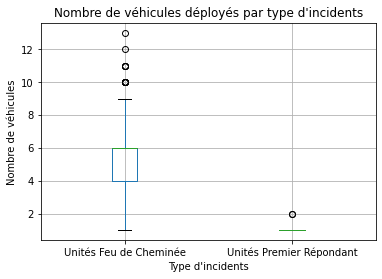

In [68]:
# 11. Créer une variable contenant le boxplot avec les colonnes du nombre d'unités déployées pour les incidents du type
#     'Feu de cheminée' et 'Premier répondant', et afficher ce dernier

boxplot_grand = new_df.boxplot(column=['Unités Feu de Cheminée','Unités Premier Répondant']).set(xlabel="Type d'incidents", ylabel="Nombre de véhicules", title="Nombre de véhicules déployés par type d'incidents")

#### Observations
Grâce au boxplot, nous pouvons rapidement voir que le nombre moyen d'unités déployées le plus élevé pour le type d'incident "Feu de cheminée" est d'environ 5 unités, tandis que le nombre moyen d'unités déployées le plus bas pour le type d'incident nommé "Premier répondant" se situe dans les alentours d'une seule unité de pompiers. Cette analyse faciliterait le déroulement des interventions des pompiers en leur permettant de connaître à l'avance le nombre de véhicules pompiers qui doivent être déployés selon le type d'incident.

# Nombre d'incidents en rapport avec le revenue moyen par région

Ici on essaye de voir s'il y a une corrélation entre les revenues moyens par région à Montréal et le nombre d'incidents qui se produisent dans ces même régions.

Pour ce faire on va joindre deux dataframe ayant les même régions, mais un qui a les revenues moyens et l'autre le nombre d'incidents pour pouvoir faire un graphique de nuage de point pour examiner les résultats.

In [69]:
# Créer un DataFrame contenant le nombre d'incident par ville/arrondissement

nombre_dincident = df_montreal.groupby(['Nom_Arrond', 'Nom_Ville'])[['Incident_nbr']].count()
nombre_dincident = nombre_dincident.reset_index()


# Déterminer si le nom de la région de 'df_montreal' est le même que le nom de la ville ou de l'arrondissement pour avoir
# les mêmes régions que dans le DataFrame concernant les revenus (df_revenu créée dans les deux prochaines cellules de code)

nombre_dincident.loc[nombre_dincident["Nom_Ville"] == "Montréal", "Région"] = nombre_dincident["Nom_Arrond"]
nombre_dincident.loc[nombre_dincident["Nom_Ville"] != "Montréal", "Région"] = nombre_dincident["Nom_Ville"]


# Enlever les colonnes inutiles pour notre analyse dans le DataFrame

nombre_dincident = nombre_dincident.drop(columns=['Nom_Arrond', 'Nom_Ville'])


# Classer par Région et en ordre alphabétique

nombre_dincident_sorted = nombre_dincident.sort_values("Région")
nombre_dincident_sorted

,Incident_nbr,Région
0,54287,Ahuntsic-Cartierville
1,18949,Anjou
3,1862,Baie-d'Urfé
4,5378,Beaconsfield
5,4566,Côte-Saint-Luc
2,68218,Côte-des-Neiges-Notre-Dame-de-Grâce
6,15146,Dollard-des-Ormeaux
7,10778,Dorval
8,2069,Hampstead
9,3,Indéterminé


In [70]:
# Enlever les régions ayant un nombre faible d'incidents (Indéterminé et L'Île-Dorval)
nombre_dincident_sorted = nombre_dincident_sorted.drop(labels=[9,11], axis=0)

# Comme les index 9 et 11 n'existent plus, nous voulons effectuer un reset des index afin d'obtenir nouvelle colonne
# d'index allant de 0 à 32

nombre_dincident_sorted = nombre_dincident_sorted.reset_index()
nombre_dincident_sorted = nombre_dincident_sorted.drop(columns=['index'])


# Affichage du DataFrame

nombre_dincident_sorted

,Incident_nbr,Région
0,54287,Ahuntsic-Cartierville
1,18949,Anjou
2,1862,Baie-d'Urfé
3,5378,Beaconsfield
4,4566,Côte-Saint-Luc
5,68218,Côte-des-Neiges-Notre-Dame-de-Grâce
6,15146,Dollard-des-Ormeaux
7,10778,Dorval
8,2069,Hampstead
9,5334,Kirkland


In [71]:
# 1. Lire le contenu du document Excel des revenus par territoire

df = pandas.read_excel("REVENU_TERRITOIRES_MONTREAL.XLSx", header=None)
df.columns = ["Statistique", "AGGLOMÉRATION DE MONTRÉAL", "Ville de Montréal", "Ahuntsic-Cartierville", "Anjou", "Côte-des-Neiges–Notre-Dame-de-Grâce", "Lachine", "LaSalle", "Le Plateau-Mont-Royal", "Le Sud-Ouest", "L'Île-Bizard–Sainte-Geneviève", "Mercier–Hochelaga-Maisonneuve", "Montréal-Nord", "Outremont", "Pierrefonds-Roxboro", "Rivière-des-Prairies–Pointe-aux-Trembles", "Rosemont–La Petite-Patrie", "Saint-Laurent", "Saint-Léonard", "Verdun", "Ville-Marie", "Villeray–Saint-Michel–Parc-Extension", "Baie-D'Urfé", "Beaconsfield", "Côte-Saint-Luc", "Dollard-Des Ormeaux", "Dorval", "Hampstead", "Kirkland", "Montréal-Est", "Montréal-Ouest", "Mont-Royal", "Pointe-Claire", "Sainte-Anne-de-Bellevue", "Senneville", "Westmount"]

# 2. Comme les 5 premières lignes ne sont pas nécessaires dans notre DataFrame, nous allons les retirer

df_revenu = df.iloc[5:285]


# 3. Isoler la ligne des revenus moyens du DataFrame en créant un nouveau DataFrame avec seulement une colonne de région
#    et une colonne de revenu moyen

# 3.1 Créer un DataFrame avec la ligne 'Revenu total moyen des ménages en 2015 ($)' provenant de df_revenu[1]
df_revenu_moyen = pandas.DataFrame(df_revenu.iloc[1])
df_revenu_moyen = df_revenu_moyen.iloc[1:]
df_revenu_moyen = df_revenu_moyen.reset_index()

# 3.2 Créer les colonnes Région et Revenu Moyen dans le DataFrame 'df_revenu_moyen'
df_revenu_moyen.columns = ["Région", "Revenu Moyen"]

# 3.3 Mettre la colonne Région en ordre alphabétique afin que l'ordre des régions soit pareil entre les deux DataFrame
#    que nous allons joindre ensemble ('df_revenue_sorted' et 'nombre_dincident_sorted')
df_revenu_sorted = df_revenu_moyen.sort_values("Région")

# 3.4 Retirer Agglomération de Montréal et la ville de Montréal, qui ne sont pas pertinentes à notre analyse

df_revenu_sorted = df_revenu_sorted.drop(labels=[0,1], axis=0)

# 4. Effectuer un reset des index afin d'obtenir nouvelle colonne d'index allant de 0 à 32

df_revenu_sorted = df_revenu_sorted.reset_index()
df_revenu_sorted = df_revenu_sorted.drop(columns=["index"])

# Affichage DataFrame
df_revenu_sorted

,Région,Revenu Moyen
0,Ahuntsic-Cartierville,70105
1,Anjou,68930
2,Baie-D'Urfé,171390
3,Beaconsfield,187173
4,Côte-Saint-Luc,94570
5,Côte-des-Neiges–Notre-Dame-de-Grâce,67274
6,Dollard-Des Ormeaux,102104
7,Dorval,89952
8,Hampstead,250497
9,Kirkland,144676


In [72]:
# Comme les régions ne sont pas écrites de la même manière dans les deux DataFrame, nous allons les uniformiser afin de
# pouvoir les jumeler en se basant sur la région (sinon, les régions ne sont pas reconnues, ce qui affiche des NaN)

df_revenu_sorted['Région']=df_revenu_sorted['Région'].replace("Baie-D'Urfé","Baie-d'Urfé") \
                                                       .replace("Côte-des-Neiges–Notre-Dame-de-Grâce","Côte-des-Neiges-Notre-Dame-de-Grâce") \
                                                       .replace("Dollard-Des Ormeaux","Dollard-des-Ormeaux") \
                                                       .replace("L'Île-Bizard–Sainte-Geneviève","L'Île-Bizard-Sainte-Geneviève") \
                                                       .replace("Dollard-Des Ormeaux","Dollard-des-Ormeaux") \
                                                       .replace("Mercier–Hochelaga-Maisonneuve","Mercier-Hochelaga-Maisonneuve") \
                                                       .replace("Rivière-des-Prairies–Pointe-aux-Trembles","Rivière-des-Prairies-Pointe-aux-Trembles") \
                                                       .replace("Rosemont–La Petite-Patrie","Rosemont-La Petite-Patrie") \
                                                       .replace("Villeray–Saint-Michel–Parc-Extension","Villeray-Saint-Michel-Parc-Extension")

In [73]:
# Joindre les deux dataframe ensemble en se basant sur la colonne Région

df_revenu_incident = df_revenu_sorted.join(nombre_dincident_sorted.set_index("Région"), on="Région")
df_revenu_incident

,Région,Revenu Moyen,Incident_nbr
0,Ahuntsic-Cartierville,70105,54287
1,Anjou,68930,18949
2,Baie-d'Urfé,171390,1862
3,Beaconsfield,187173,5378
4,Côte-Saint-Luc,94570,4566
5,Côte-des-Neiges-Notre-Dame-de-Grâce,67274,68218
6,Dollard-des-Ormeaux,102104,15146
7,Dorval,89952,10778
8,Hampstead,250497,2069
9,Kirkland,144676,5334


In [74]:
# Classer le nombre d'incidents en ordre décroissant afin de mieux visualiser la tendance sur le graphique (couleurs)

df_revenu_sorted_incidents = df_revenu_incident.sort_values("Incident_nbr")

# Affichage

df_revenu_sorted_incidents

,Région,Revenu Moyen,Incident_nbr
28,Senneville,203790,618
19,Montréal-Ouest,159374,1494
2,Baie-d'Urfé,171390,1862
8,Hampstead,250497,2069
27,Sainte-Anne-de-Bellevue,102969,2495
17,Montréal-Est,58594,3615
4,Côte-Saint-Luc,94570,4566
9,Kirkland,144676,5334
3,Beaconsfield,187173,5378
10,L'Île-Bizard-Sainte-Geneviève,115013,7010


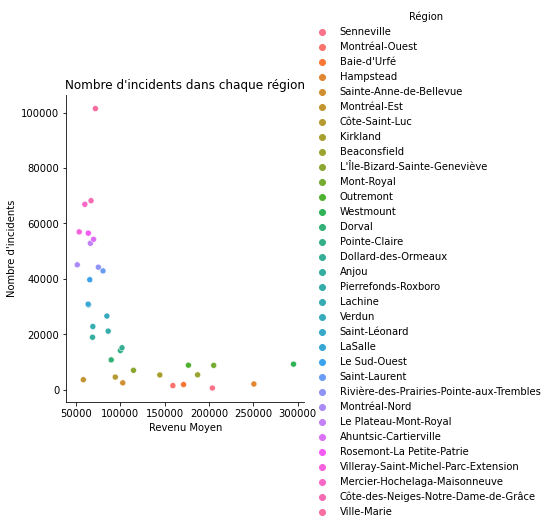

In [75]:
# Création d'un graphique à nuage de points afin de représenter le nombre d'incidents en fonction du revenu considérant 
# la région

seaborn.relplot(kind='scatter', data=df_revenu_sorted_incidents, x="Revenu Moyen",y="Incident_nbr", hue="Région"). \
                set(xlabel="Revenu Moyen", ylabel="Nombre d'incidents", title="Nombre d'incidents dans chaque région")

## Apprentissage

- **HeatMap with Time**: Pour la HeatMapWithTime, qui nous a permis de voir les variations des incidents nautiques dans le temps sur une Map à partir d'un DataFrame incluant les mois et les coordonnées gérographiques, nous avons appris que nous devions importer le module 'folium' ainsi que le module 'Defaultdict' de la librairie 'collections'. Nous avons appris qu'une manière de faire est de créer un dictionnaire par défaut, nommé Defaultdict dans Python (output: defaultdict(list, {})). Il est important d'utiliser DefaultDict, car il permet de créer un dictionnaire avec une liste en définissant une valeur par défaut pour la clé (dans notre cas, cette étape n'aurait pas été possible en convertissant une liste avec 'Dict'). Ensuite, nous avons utilisé une For Loop qui ajoute les données de notre DataFrame dans le 'Defaultdict' (data[row.month].append([row.latitude, row.longitude])). Pour ce faire, les lignes de notre DataFrame ont été converties en intertuples, qui utilisent le premier élément de la ligne (mois) en tant qu'index et les autres éléments de la ligne (latitude, longitude) en tant que tuples for row in endroits_incidents.itertuples (for row in endroits_incidents.itertuples():). Finalement, nous avons créé une variable qui utilise la fonction HeatMapWithTime pour créer une Map de chaleur. Dans cette fonction, nous avons appris que les paramètres 'data' et 'index' de la fonction doivent être converties en liste. Finalement, il nous suffit de jumeler la HeatMapWithTime avec la Map de Montréal.


- **Graphique comportant plusieurs Boxplot** : Pour faire un graphique incluant plusieurs Boxplot, nous avons appris que nous devions joindre nos différentes variables représentant les DataFrame qui contiennent les valeurs que nous voulons visualiser sous un même DataFrame.



- **Nombre de véhicules déployés pour les incidents nautiques supérieurs que lors d'inondations** : Nous avons appris que les inondations font partie des incidents qui, en moyenne, nécessitent le moins de véhicules déployés (chacun de ces véhicules étant composé de 3 à 5 pompiers). En effet, sa moyenne se trouve à 1,29 véhicules, comparativement aux types d'incidents requièrant le plus personnel, notamment lors des incidents nautiques avec 5,26 véhicules et les feux de cheminée avec 5,74 véhicules (il est important de noter que ce sont les événements qui sont classés le plus haut selon notre liste, peut-être que ces résultats peuvent varier légèrement selon les données utilisées). Nous aurions pensé que cette catégorie se trouverait parmi les interventions nécessitant le plus de personnel dû à l'ampleur que peuvent prendre les inondations ainsi que le nombre de personnes pouvant être affectées par ce genre d'événement. Ces résultats nous semblent quelque peu contre-intuitif, car nous aurions initialement cru le contraire, ce qui prouve l'importance de faire des analyses et ne pas faire des conclusions trop rapidement.



- **Ville-Marie et Côte-des-Neiges-Notre-Dame-de-Grâce à Montréal sont ceux qui ont le plus d'incidents** : Ce qui a été une plus grande découverte est le fait qu'il y ait un lien entre le revenu et le nombre d'incidents. En effet, selon nos analyses, il y a une tendance assez marquée qui démontre que les emplacements ayant un revenu plus faible ont un nombre d'incidents plus élevés que ceux qui sont plus fortunés. Cela devrait notamment être pris en considération lors du nombre de casernes à instaurer à certaines places, afin que les casernes soient plus nombreuses aux endroits où les incidents sont les plus fréquents. Cela permettrait un meilleur service et une intervention plus rapide où que les pompiers sont demandés.